In [1]:
import yaml
import os
import numpy as np

In [2]:
def reorganize_data(data):
    ripple = []
    timestamps = []
    for packet in data:
        ripple.append(packet["signal"][0])
        ripple.append(packet["signal"][1])
        ripple.append(packet["signal"][2])
        timestamps.append(packet["timestamps"][0])
        timestamps.append(packet["timestamps"][1])
        timestamps.append(packet["timestamps"][2])
    return ripple, timestamps
    

In [3]:
data_path = os.path.join(os.path.realpath("/home/chaputmarine/log/default/_last_run"), "datasinkcx/datasinkcx.0_source.cx.0.yaml")
with open(data_path, "r") as file:
    data = yaml.safe_load(file)

cx_source, cx_ts = reorganize_data(data)



In [4]:
data_path = os.path.join(os.path.realpath("/home/chaputmarine/log/default/_last_run"), "datasinkcx/datasinkcx.1_source.hp.0.yaml")
with open(data_path, "r") as file:
    data = yaml.safe_load(file)

hp_source, hp_ts = reorganize_data(data)

In [5]:
data_path = os.path.join(os.path.realpath("/home/chaputmarine/log/default/_last_run"), "datasinkcx/datasinkcx.2_ripple-filter.data.0.yaml")
with open(data_path, "r") as file:
    data = yaml.safe_load(file)

hp_filt, hp_filt_ts = reorganize_data(data)

In [6]:
data_path = os.path.join(os.path.realpath("/home/chaputmarine/log/default/_last_run"), "datasinkcx/datasinkcx.3_ripple-filter.data.1.yaml")
with open(data_path, "r") as file:
    data = yaml.safe_load(file)

cx_filt, cx_filt_ts = reorganize_data(data)

In [7]:
data_path = os.path.join(os.path.realpath("/home/chaputmarine/log/default/_last_run"), "datasink-ripplestats/datasink-ripplestats.0_HIPPOCAMPUS-detector.statistics.0.yaml")
with open(data_path, "r") as file:
    data = yaml.safe_load(file)

hp_detect, hp_detect_ts = reorganize_data(data)

hp_detect

TypeError: 'NoneType' object is not iterable

In [8]:
hp_thresh = data[0]["signal"][1::2] + data[1]["signal"][1::2]
hp_stats = data[0]["signal"][0::2] + data[1]["signal"][0::2]
hp_detect_ts = data[0]["timestamps"] + data[1]["timestamps"]

print(data_path)




TypeError: 'NoneType' object is not subscriptable

In [9]:
data_path = os.path.join(os.path.realpath("/home/chaputmarine/log/default/_last_run"), "datasink-ripplestats/datasink-ripplestats.1_CORTEX-detector.statistics.0.yaml")
with open(data_path, "r") as file:
    data = yaml.safe_load(file)

cx_detect, cx_detect_ts = reorganize_data(data)

FileNotFoundError: [Errno 2] No such file or directory: '/home/chaputmarine/log/default/20201006_113217/datasink-ripplestats/datasink-ripplestats.1_CORTEX-detector.statistics.0.yaml'

NameError: name 'hp_detect_ts' is not defined

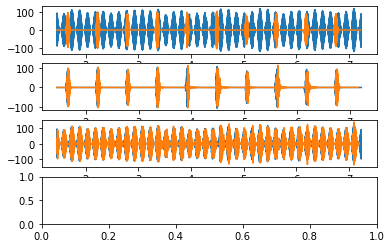

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)

ax1.plot(hp_ts, hp_source)
ax1.plot(cx_ts, cx_source)

ax2.plot(cx_ts, cx_source)
ax2.plot(cx_filt_ts, cx_filt)

ax3.plot(hp_ts, hp_source)
ax3.plot(hp_filt_ts, hp_filt)

ax4.plot(hp_detect_ts, hp_thresh)
ax4.plot(hp_detect_ts, hp_stats)

In [ ]:

tmin = 12000
tmax = 20000
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)

ax1.plot(hp_ts[tmin:tmax], hp_source[tmin:tmax])
ax1.plot(cx_ts[tmin:tmax], cx_source[tmin:tmax])

ax2.plot(cx_ts[tmin:tmax], cx_source[tmin:tmax])
ax2.plot(cx_filt_ts[tmin:tmax], cx_filt[tmin:tmax])

ax3.plot(hp_ts[tmin:tmax], hp_source[tmin:tmax])
ax3.plot(hp_filt_ts[tmin:tmax], hp_filt[tmin:tmax])


ax4.plot(hp_detect_ts[tmin:tmax], hp_thresh[tmin:tmax])
ax4.plot(hp_detect_ts[tmin:tmax], hp_stats[tmin:tmax])

In [ ]:
import numpy as np

max = 13800
min = 20000
plt.plot(np.array(timestamps2[min:min])/1000, ripple2[max:min])
plt.plot(np.array(timestamps2[max:min])/1000, ripple1[max:min])
plt.xlabel("time ms")
#plt.plot(range(max, min), ripple2[max:min])


In [ ]:
#from jupyterplot import ProgressPlot
#import numpy as np
#start = 40000
#end = 42000

#pp = ProgressPlot( x_iterator=False, x_label='time (ms)',line_names=["channel 9", "channel 15"], y_lim=[-1,1])
#for i in range(start, end,10):
    
#    pp.update(timestamps1[i]/1000- 1200, [[ripple1[i], ripple2[i"]+100]])
#pp.finalize()